##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# 基本分类：对服装图像进行分类

<table class="tfo-notebook-buttons" align="left">
  <td><a target="_blank" href="https://tensorflow.google.cn/tutorials/keras/classification"><img src="https://tensorflow.google.cn/images/tf_logo_32px.png">在 TensorFlow.org 上查看</a></td>
  <td><a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/zh-cn/tutorials/keras/classification.ipynb"><img src="https://tensorflow.google.cn/images/colab_logo_32px.png">在 Google Colab 中运行</a></td>
  <td><a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/zh-cn/tutorials/keras/classification.ipynb"><img src="https://tensorflow.google.cn/images/GitHub-Mark-32px.png">在 GitHub 上查看源代码</a></td>
  <td><a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/zh-cn/tutorials/keras/classification.ipynb"><img src="https://tensorflow.google.cn/images/download_logo_32px.png">下载笔记本</a></td>
</table>

本指南将训练一个神经网络模型，对运动鞋和衬衫等服装图像进行分类。即使您不理解所有细节也没关系；这只是对完整 TensorFlow 程序的快速概述，详细内容会在您实际操作的同时进行介绍。

本指南使用了 [tf.keras](https://tensorflow.google.cn/guide/keras)，它是 TensorFlow 中用来构建和训练模型的高级 API。

In [3]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2022-08-31 04:53:21.992867: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


2022-08-31 04:53:22.704392: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvrtc.so.11.1: cannot open shared object file: No such file or directory
2022-08-31 04:53:22.704645: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvrtc.so.11.1: cannot open shared object file: No such file or directory
2022-08-31 04:53:22.704658: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


2.10.0-rc3


## 导入 Fashion MNIST 数据集

本指南使用 [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) 数据集，该数据集包含 10 个类别的 70,000 个灰度图像。这些图像以低分辨率（28x28 像素）展示了单件衣物，如下所示：

<table>
  <tr><td>     <img alt="Fashion MNIST sprite" src="https://tensorflow.google.cn/images/fashion-mnist-sprite.png"> </td></tr>
  <tr><td align="center">     <b>图 1.</b>  <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST 样本</a>（由 Zalando 提供，MIT 许可）。<br> </td></tr>
</table>

Fashion MNIST 旨在临时替代经典 [MNIST](http://yann.lecun.com/exdb/mnist/) 数据集，后者常被用作计算机视觉机器学习程序的“Hello, World”。MNIST 数据集包含手写数字（0、1、2 等）的图像，其格式与您将使用的衣物图像的格式相同。

本指南使用 Fashion MNIST 来实现多样化，因为它比常规 MNIST 更具挑战性。这两个数据集都相对较小，都用于验证某个算法是否按预期工作。对于代码的测试和调试，它们都是很好的起点。

在本指南中，我们使用 60,000 张图像来训练网络，使用 10,000 张图像来评估网络学习对图像进行分类的准确程度。您可以直接从 TensorFlow 中访问 Fashion MNIST。直接从 TensorFlow 中导入和加载 Fashion MNIST 数据：

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

加载数据集会返回四个 NumPy 数组：

- `train_images` 和 `train_labels` 数组是*训练集*，即模型用于学习的数据。
- *测试集*、`test_images` 和 `test_labels` 数组会被用来对模型进行测试。

图像是 28x28 的 NumPy 数组，像素值介于 0 到 255 之间。*标签*是整数数组，介于 0 到 9 之间。这些标签对应于图像所代表的服装*类*：

<table>
  <tr>
    <th>标签</th>
    <th>类</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T恤/上衣</td>
  </tr>
  <tr>
    <td>1</td>
    <td>裤子</td>
  </tr>
    <tr>
    <td>2</td>
    <td>套头衫</td>
  </tr>
    <tr>
    <td>3</td>
    <td>连衣裙</td>
  </tr>
    <tr>
    <td>4</td>
    <td>外套</td>
  </tr>
    <tr>
    <td>5</td>
    <td>凉鞋</td>
  </tr>
    <tr>
    <td>6</td>
    <td>衬衫</td>
  </tr>
    <tr>
    <td>7</td>
    <td>运动鞋</td>
  </tr>
    <tr>
    <td>8</td>
    <td>包</td>
  </tr>
    <tr>
    <td>9</td>
    <td>短靴</td>
  </tr>
</table>

每个图像都会被映射到一个标签。由于数据集不包括*类名称*，请将它们存储在下方，供稍后绘制图像时使用：

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 浏览数据

在训练模型之前，我们先浏览一下数据集的格式。以下代码显示训练集中有 60,000 个图像，每个图像由 28 x 28 的像素表示：

In [6]:
train_images.shape

(60000, 28, 28)

同样，训练集中有 60,000 个标签：

In [7]:
len(train_labels)

60000

每个标签都是一个 0 到 9 之间的整数：

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

测试集中有 10,000 个图像。同样，每个图像都由 28x28 个像素表示：

In [9]:
test_images.shape

(10000, 28, 28)

测试集包含 10,000 个图像标签：

In [10]:
len(test_labels)

10000

## 预处理数据

在训练网络之前，必须对数据进行预处理。如果您检查训练集中的第一个图像，您会看到像素值处于 0 到 255 之间：

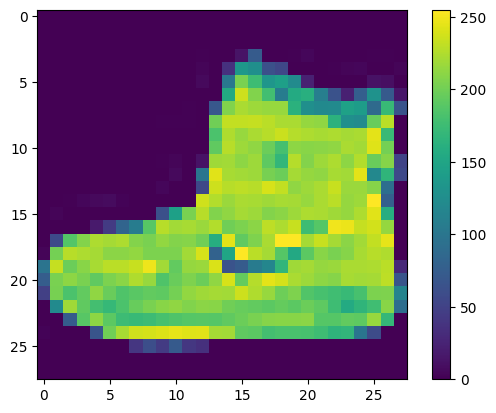

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

将这些值缩小至 0 到 1 之间，然后将其馈送到神经网络模型。为此，请将这些值除以 255。请务必以相同的方式对*训练集*和*测试集*进行预处理：

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

为了验证数据的格式是否正确，以及您是否已准备好构建和训练网络，让我们显示*训练集*中的前 25 个图像，并在每个图像下方显示类名称。

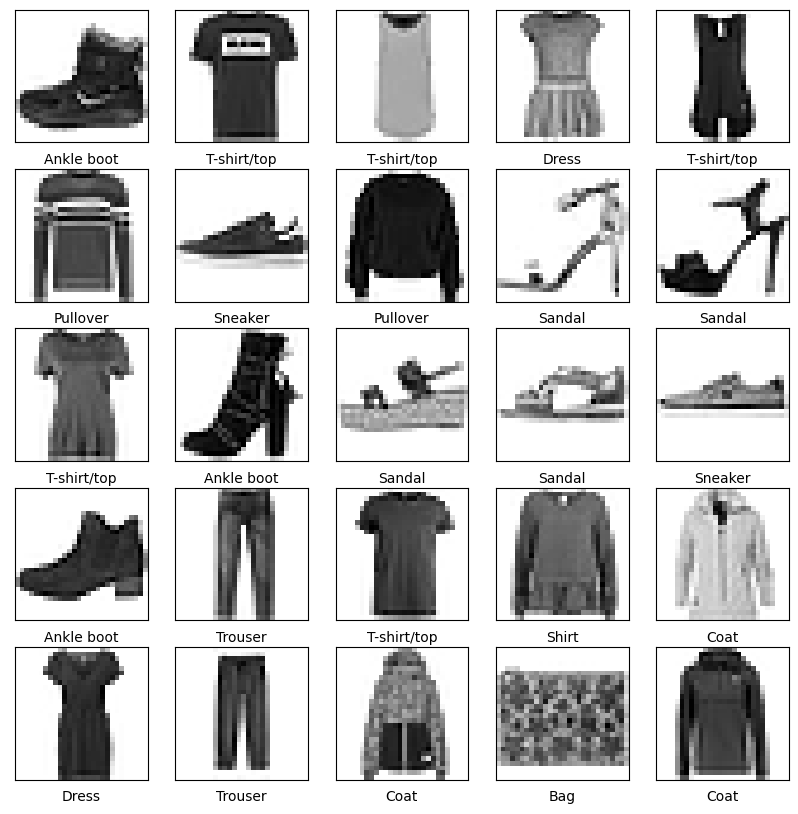

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 构建模型

构建神经网络需要先配置模型的层，然后再编译模型。

### 设置层

神经网络的基本组成部分是<em>层</em>。层会从向其馈送的数据中提取表示形式。希望这些表示形式有助于解决手头上的问题。

大多数深度学习都包括将简单的层链接在一起。大多数层（如 `tf.keras.layers.Dense`）都具有在训练期间才会学习的参数。

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

该网络的第一层 `tf.keras.layers.Flatten` 将图像格式从二维数组（28 x 28 像素）转换成一维数组（28 x 28 = 784 像素）。将该层视为图像中未堆叠的像素行并将其排列起来。该层没有要学习的参数，它只会重新格式化数据。

展平像素后，网络会包括两个 `tf.keras.layers.Dense` 层的序列。它们是密集连接或全连接神经层。第一个 `Dense` 层有 128 个节点（或神经元）。第二个（也是最后一个）层会返回一个长度为 10 的 logits 数组。每个节点都包含一个得分，用来表示当前图像属于 10 个类中的哪一类。

### 编译模型

在准备对模型进行训练之前，还需要再对其进行一些设置。以下内容是在模型的<em>编译</em>步骤中添加的：

- <em>损失函数</em> - 测量模型在训练期间的准确程度。你希望最小化此函数，以便将模型“引导”到正确的方向上。
- <em>优化器</em> - 决定模型如何根据其看到的数据和自身的损失函数进行更新。
- <em>指标</em> - 用于监控训练和测试步骤。以下示例使用了*准确率*，即被正确分类的图像的比率。

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 训练模型

训练神经网络模型需要执行以下步骤：

1. 将训练数据馈送给模型。在本例中，训练数据位于 `train_images` 和 `train_labels` 数组中。
2. 模型学习将图像和标签关联起来。
3. 要求模型对测试集（在本例中为 `test_images` 数组）进行预测。
4. 验证预测是否与 `test_labels` 数组中的标签相匹配。


### 向模型馈送数据

要开始训练，请调用 <code>model.fit</code> 方法，这样命名是因为该方法会将模型与训练数据进行“拟合”：

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


   1/1875 [..............................] - ETA: 18:18 - loss: 2.3701 - accuracy: 0.0312

  27/1875 [..............................] - ETA: 3s - loss: 1.3345 - accuracy: 0.5556   

  56/1875 [..............................] - ETA: 3s - loss: 1.0613 - accuracy: 0.6412

  84/1875 [>.............................] - ETA: 3s - loss: 0.9398 - accuracy: 0.6834

 111/1875 [>.............................] - ETA: 3s - loss: 0.8667 - accuracy: 0.7061

 138/1875 [=>............................] - ETA: 3s - loss: 0.8184 - accuracy: 0.7208

 165/1875 [=>............................] - ETA: 3s - loss: 0.7902 - accuracy: 0.7314

 193/1875 [==>...........................] - ETA: 3s - loss: 0.7645 - accuracy: 0.7393

 221/1875 [==>...........................] - ETA: 3s - loss: 0.7385 - accuracy: 0.7460

 248/1875 [==>...........................] - ETA: 3s - loss: 0.7171 - accuracy: 0.7524

 276/1875 [===>..........................] - ETA: 2s - loss: 0.7044 - accuracy: 0.7572

 304/1875 [===>..........................] - ETA: 2s - loss: 0.6956 - accuracy: 0.7615

 331/1875 [====>.........................] - ETA: 2s - loss: 0.6841 - accuracy: 0.7655

 358/1875 [====>.........................] - ETA: 2s - loss: 0.6747 - accuracy: 0.7683

 386/1875 [=====>........................] - ETA: 2s - loss: 0.6681 - accuracy: 0.7693

 414/1875 [=====>........................] - ETA: 2s - loss: 0.6576 - accuracy: 0.7729

 442/1875 [======>.......................] - ETA: 2s - loss: 0.6497 - accuracy: 0.7747

 470/1875 [======>.......................] - ETA: 2s - loss: 0.6401 - accuracy: 0.7783

 498/1875 [======>.......................] - ETA: 2s - loss: 0.6302 - accuracy: 0.7816

 526/1875 [=======>......................] - ETA: 2s - loss: 0.6191 - accuracy: 0.7859

 554/1875 [=======>......................] - ETA: 2s - loss: 0.6138 - accuracy: 0.7881

 582/1875 [========>.....................] - ETA: 2s - loss: 0.6079 - accuracy: 0.7896

 610/1875 [========>.....................] - ETA: 2s - loss: 0.6050 - accuracy: 0.7911

 637/1875 [=========>....................] - ETA: 2s - loss: 0.5991 - accuracy: 0.7934

 664/1875 [=========>....................] - ETA: 2s - loss: 0.5971 - accuracy: 0.7935

 690/1875 [==========>...................] - ETA: 2s - loss: 0.5925 - accuracy: 0.7953

 717/1875 [==========>...................] - ETA: 2s - loss: 0.5880 - accuracy: 0.7960

 744/1875 [==========>...................] - ETA: 2s - loss: 0.5841 - accuracy: 0.7970

 772/1875 [===========>..................] - ETA: 2s - loss: 0.5804 - accuracy: 0.7981

 801/1875 [===========>..................] - ETA: 1s - loss: 0.5772 - accuracy: 0.7987

 829/1875 [============>.................] - ETA: 1s - loss: 0.5733 - accuracy: 0.7999

 857/1875 [============>.................] - ETA: 1s - loss: 0.5736 - accuracy: 0.7997

 885/1875 [=============>................] - ETA: 1s - loss: 0.5687 - accuracy: 0.8014

 913/1875 [=============>................] - ETA: 1s - loss: 0.5647 - accuracy: 0.8028

 941/1875 [==============>...............] - ETA: 1s - loss: 0.5625 - accuracy: 0.8040

 968/1875 [==============>...............] - ETA: 1s - loss: 0.5596 - accuracy: 0.8052

 994/1875 [==============>...............] - ETA: 1s - loss: 0.5567 - accuracy: 0.8062

1020/1875 [===============>..............] - ETA: 1s - loss: 0.5535 - accuracy: 0.8073

1046/1875 [===============>..............] - ETA: 1s - loss: 0.5501 - accuracy: 0.8087

1072/1875 [================>.............] - ETA: 1s - loss: 0.5486 - accuracy: 0.8090

1098/1875 [================>.............] - ETA: 1s - loss: 0.5463 - accuracy: 0.8098

1125/1875 [=================>............] - ETA: 1s - loss: 0.5441 - accuracy: 0.8104

1152/1875 [=================>............] - ETA: 1s - loss: 0.5419 - accuracy: 0.8113

1178/1875 [=================>............] - ETA: 1s - loss: 0.5386 - accuracy: 0.8124

1204/1875 [==================>...........] - ETA: 1s - loss: 0.5364 - accuracy: 0.8130

1231/1875 [==================>...........] - ETA: 1s - loss: 0.5347 - accuracy: 0.8138

1258/1875 [===================>..........] - ETA: 1s - loss: 0.5322 - accuracy: 0.8143

1285/1875 [===================>..........] - ETA: 1s - loss: 0.5300 - accuracy: 0.8151

1312/1875 [===================>..........] - ETA: 1s - loss: 0.5277 - accuracy: 0.8159

1340/1875 [====================>.........] - ETA: 0s - loss: 0.5258 - accuracy: 0.8164

1369/1875 [====================>.........] - ETA: 0s - loss: 0.5234 - accuracy: 0.8170

1397/1875 [=====================>........] - ETA: 0s - loss: 0.5199 - accuracy: 0.8181

1425/1875 [=====================>........] - ETA: 0s - loss: 0.5180 - accuracy: 0.8185

1452/1875 [======================>.......] - ETA: 0s - loss: 0.5161 - accuracy: 0.8191

1479/1875 [======================>.......] - ETA: 0s - loss: 0.5150 - accuracy: 0.8192

1506/1875 [=======================>......] - ETA: 0s - loss: 0.5132 - accuracy: 0.8199

1533/1875 [=======================>......] - ETA: 0s - loss: 0.5114 - accuracy: 0.8206

1560/1875 [=======================>......] - ETA: 0s - loss: 0.5106 - accuracy: 0.8206

1588/1875 [========================>.....] - ETA: 0s - loss: 0.5088 - accuracy: 0.8213

1616/1875 [========================>.....] - ETA: 0s - loss: 0.5065 - accuracy: 0.8220

1644/1875 [=========================>....] - ETA: 0s - loss: 0.5054 - accuracy: 0.8225

1672/1875 [=========================>....] - ETA: 0s - loss: 0.5042 - accuracy: 0.8231

1700/1875 [==========================>...] - ETA: 0s - loss: 0.5022 - accuracy: 0.8238

1728/1875 [==========================>...] - ETA: 0s - loss: 0.5011 - accuracy: 0.8241

1756/1875 [===========================>..] - ETA: 0s - loss: 0.4993 - accuracy: 0.8246

1784/1875 [===========================>..] - ETA: 0s - loss: 0.4981 - accuracy: 0.8251

1812/1875 [===========================>..] - ETA: 0s - loss: 0.4962 - accuracy: 0.8259

1840/1875 [============================>.] - ETA: 0s - loss: 0.4955 - accuracy: 0.8261

1868/1875 [============================>.] - ETA: 0s - loss: 0.4944 - accuracy: 0.8266

1875/1875 [==============================] - 4s 2ms/step - loss: 0.4942 - accuracy: 0.8267


Epoch 2/10


   1/1875 [..............................] - ETA: 5s - loss: 0.5368 - accuracy: 0.8438

  29/1875 [..............................] - ETA: 3s - loss: 0.3744 - accuracy: 0.8664

  57/1875 [..............................] - ETA: 3s - loss: 0.3911 - accuracy: 0.8503

  84/1875 [>.............................] - ETA: 3s - loss: 0.4114 - accuracy: 0.8493

 112/1875 [>.............................] - ETA: 3s - loss: 0.4050 - accuracy: 0.8513

 139/1875 [=>............................] - ETA: 3s - loss: 0.4099 - accuracy: 0.8507

 167/1875 [=>............................] - ETA: 3s - loss: 0.4040 - accuracy: 0.8539

 195/1875 [==>...........................] - ETA: 3s - loss: 0.4042 - accuracy: 0.8530

 223/1875 [==>...........................] - ETA: 3s - loss: 0.4014 - accuracy: 0.8547

 252/1875 [===>..........................] - ETA: 2s - loss: 0.3991 - accuracy: 0.8570

 282/1875 [===>..........................] - ETA: 2s - loss: 0.3937 - accuracy: 0.8579

 310/1875 [===>..........................] - ETA: 2s - loss: 0.3902 - accuracy: 0.8609

 338/1875 [====>.........................] - ETA: 2s - loss: 0.3927 - accuracy: 0.8600

 366/1875 [====>.........................] - ETA: 2s - loss: 0.3896 - accuracy: 0.8612

 395/1875 [=====>........................] - ETA: 2s - loss: 0.3868 - accuracy: 0.8626

 424/1875 [=====>........................] - ETA: 2s - loss: 0.3853 - accuracy: 0.8620

 453/1875 [======>.......................] - ETA: 2s - loss: 0.3848 - accuracy: 0.8623

 482/1875 [======>.......................] - ETA: 2s - loss: 0.3847 - accuracy: 0.8622

 510/1875 [=======>......................] - ETA: 2s - loss: 0.3840 - accuracy: 0.8623

 537/1875 [=======>......................] - ETA: 2s - loss: 0.3832 - accuracy: 0.8627

 564/1875 [========>.....................] - ETA: 2s - loss: 0.3864 - accuracy: 0.8616

 592/1875 [========>.....................] - ETA: 2s - loss: 0.3854 - accuracy: 0.8612

 620/1875 [========>.....................] - ETA: 2s - loss: 0.3860 - accuracy: 0.8612

 648/1875 [=========>....................] - ETA: 2s - loss: 0.3857 - accuracy: 0.8614

 676/1875 [=========>....................] - ETA: 2s - loss: 0.3847 - accuracy: 0.8621

 704/1875 [==========>...................] - ETA: 2s - loss: 0.3831 - accuracy: 0.8631

 732/1875 [==========>...................] - ETA: 2s - loss: 0.3837 - accuracy: 0.8630

 760/1875 [===========>..................] - ETA: 2s - loss: 0.3827 - accuracy: 0.8636

 789/1875 [===========>..................] - ETA: 1s - loss: 0.3822 - accuracy: 0.8636

 818/1875 [============>.................] - ETA: 1s - loss: 0.3819 - accuracy: 0.8640

 845/1875 [============>.................] - ETA: 1s - loss: 0.3806 - accuracy: 0.8645

 874/1875 [============>.................] - ETA: 1s - loss: 0.3799 - accuracy: 0.8648

 902/1875 [=============>................] - ETA: 1s - loss: 0.3785 - accuracy: 0.8649

 929/1875 [=============>................] - ETA: 1s - loss: 0.3787 - accuracy: 0.8646

 956/1875 [==============>...............] - ETA: 1s - loss: 0.3780 - accuracy: 0.8646

 983/1875 [==============>...............] - ETA: 1s - loss: 0.3777 - accuracy: 0.8647

1011/1875 [===============>..............] - ETA: 1s - loss: 0.3772 - accuracy: 0.8650

1039/1875 [===============>..............] - ETA: 1s - loss: 0.3767 - accuracy: 0.8651

1067/1875 [================>.............] - ETA: 1s - loss: 0.3777 - accuracy: 0.8646

1095/1875 [================>.............] - ETA: 1s - loss: 0.3774 - accuracy: 0.8644

1122/1875 [================>.............] - ETA: 1s - loss: 0.3776 - accuracy: 0.8646

1150/1875 [=================>............] - ETA: 1s - loss: 0.3783 - accuracy: 0.8642

1178/1875 [=================>............] - ETA: 1s - loss: 0.3779 - accuracy: 0.8641

1206/1875 [==================>...........] - ETA: 1s - loss: 0.3769 - accuracy: 0.8644

1234/1875 [==================>...........] - ETA: 1s - loss: 0.3763 - accuracy: 0.8645

1262/1875 [===================>..........] - ETA: 1s - loss: 0.3764 - accuracy: 0.8642

1290/1875 [===================>..........] - ETA: 1s - loss: 0.3758 - accuracy: 0.8645

1318/1875 [====================>.........] - ETA: 1s - loss: 0.3765 - accuracy: 0.8644

1345/1875 [====================>.........] - ETA: 0s - loss: 0.3758 - accuracy: 0.8649

1372/1875 [====================>.........] - ETA: 0s - loss: 0.3758 - accuracy: 0.8649

1399/1875 [=====================>........] - ETA: 0s - loss: 0.3764 - accuracy: 0.8646

1426/1875 [=====================>........] - ETA: 0s - loss: 0.3769 - accuracy: 0.8647

1453/1875 [======================>.......] - ETA: 0s - loss: 0.3767 - accuracy: 0.8648

1481/1875 [======================>.......] - ETA: 0s - loss: 0.3759 - accuracy: 0.8649

1508/1875 [=======================>......] - ETA: 0s - loss: 0.3766 - accuracy: 0.8646

1535/1875 [=======================>......] - ETA: 0s - loss: 0.3770 - accuracy: 0.8646

1563/1875 [========================>.....] - ETA: 0s - loss: 0.3767 - accuracy: 0.8645

1590/1875 [========================>.....] - ETA: 0s - loss: 0.3775 - accuracy: 0.8642

1617/1875 [========================>.....] - ETA: 0s - loss: 0.3768 - accuracy: 0.8644

1645/1875 [=========================>....] - ETA: 0s - loss: 0.3765 - accuracy: 0.8644

1672/1875 [=========================>....] - ETA: 0s - loss: 0.3766 - accuracy: 0.8644

1699/1875 [==========================>...] - ETA: 0s - loss: 0.3765 - accuracy: 0.8644

1727/1875 [==========================>...] - ETA: 0s - loss: 0.3760 - accuracy: 0.8646

1755/1875 [===========================>..] - ETA: 0s - loss: 0.3758 - accuracy: 0.8645

1783/1875 [===========================>..] - ETA: 0s - loss: 0.3756 - accuracy: 0.8644

1811/1875 [===========================>..] - ETA: 0s - loss: 0.3750 - accuracy: 0.8646

1840/1875 [============================>.] - ETA: 0s - loss: 0.3754 - accuracy: 0.8645

1868/1875 [============================>.] - ETA: 0s - loss: 0.3748 - accuracy: 0.8648

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3747 - accuracy: 0.8648


Epoch 3/10


   1/1875 [..............................] - ETA: 4s - loss: 0.1828 - accuracy: 0.9062

  28/1875 [..............................] - ETA: 3s - loss: 0.3573 - accuracy: 0.8616

  56/1875 [..............................] - ETA: 3s - loss: 0.3516 - accuracy: 0.8666

  84/1875 [>.............................] - ETA: 3s - loss: 0.3394 - accuracy: 0.8705

 112/1875 [>.............................] - ETA: 3s - loss: 0.3448 - accuracy: 0.8714

 140/1875 [=>............................] - ETA: 3s - loss: 0.3421 - accuracy: 0.8714

 167/1875 [=>............................] - ETA: 3s - loss: 0.3363 - accuracy: 0.8724

 195/1875 [==>...........................] - ETA: 3s - loss: 0.3326 - accuracy: 0.8737

 223/1875 [==>...........................] - ETA: 3s - loss: 0.3305 - accuracy: 0.8735

 251/1875 [===>..........................] - ETA: 2s - loss: 0.3339 - accuracy: 0.8730

 280/1875 [===>..........................] - ETA: 2s - loss: 0.3355 - accuracy: 0.8732

 309/1875 [===>..........................] - ETA: 2s - loss: 0.3366 - accuracy: 0.8740

 337/1875 [====>.........................] - ETA: 2s - loss: 0.3379 - accuracy: 0.8749

 364/1875 [====>.........................] - ETA: 2s - loss: 0.3377 - accuracy: 0.8748

 391/1875 [=====>........................] - ETA: 2s - loss: 0.3404 - accuracy: 0.8741

 419/1875 [=====>........................] - ETA: 2s - loss: 0.3403 - accuracy: 0.8743

 446/1875 [======>.......................] - ETA: 2s - loss: 0.3420 - accuracy: 0.8737

 473/1875 [======>.......................] - ETA: 2s - loss: 0.3422 - accuracy: 0.8737

 500/1875 [=======>......................] - ETA: 2s - loss: 0.3454 - accuracy: 0.8726

 528/1875 [=======>......................] - ETA: 2s - loss: 0.3456 - accuracy: 0.8723

 555/1875 [=======>......................] - ETA: 2s - loss: 0.3461 - accuracy: 0.8723

 581/1875 [========>.....................] - ETA: 2s - loss: 0.3456 - accuracy: 0.8724

 607/1875 [========>.....................] - ETA: 2s - loss: 0.3445 - accuracy: 0.8723

 634/1875 [=========>....................] - ETA: 2s - loss: 0.3448 - accuracy: 0.8728

 661/1875 [=========>....................] - ETA: 2s - loss: 0.3443 - accuracy: 0.8731

 687/1875 [=========>....................] - ETA: 2s - loss: 0.3440 - accuracy: 0.8731

 714/1875 [==========>...................] - ETA: 2s - loss: 0.3438 - accuracy: 0.8730

 741/1875 [==========>...................] - ETA: 2s - loss: 0.3427 - accuracy: 0.8735

 768/1875 [===========>..................] - ETA: 2s - loss: 0.3422 - accuracy: 0.8738

 795/1875 [===========>..................] - ETA: 2s - loss: 0.3415 - accuracy: 0.8740

 822/1875 [============>.................] - ETA: 1s - loss: 0.3407 - accuracy: 0.8736

 848/1875 [============>.................] - ETA: 1s - loss: 0.3404 - accuracy: 0.8739

 875/1875 [=============>................] - ETA: 1s - loss: 0.3398 - accuracy: 0.8743

 902/1875 [=============>................] - ETA: 1s - loss: 0.3398 - accuracy: 0.8744

 929/1875 [=============>................] - ETA: 1s - loss: 0.3412 - accuracy: 0.8742

 957/1875 [==============>...............] - ETA: 1s - loss: 0.3413 - accuracy: 0.8741

 985/1875 [==============>...............] - ETA: 1s - loss: 0.3420 - accuracy: 0.8736

1012/1875 [===============>..............] - ETA: 1s - loss: 0.3420 - accuracy: 0.8735

1039/1875 [===============>..............] - ETA: 1s - loss: 0.3422 - accuracy: 0.8735

1066/1875 [================>.............] - ETA: 1s - loss: 0.3431 - accuracy: 0.8736

1094/1875 [================>.............] - ETA: 1s - loss: 0.3442 - accuracy: 0.8735

1121/1875 [================>.............] - ETA: 1s - loss: 0.3443 - accuracy: 0.8737

1149/1875 [=================>............] - ETA: 1s - loss: 0.3444 - accuracy: 0.8738

1176/1875 [=================>............] - ETA: 1s - loss: 0.3441 - accuracy: 0.8740

1204/1875 [==================>...........] - ETA: 1s - loss: 0.3437 - accuracy: 0.8744

1231/1875 [==================>...........] - ETA: 1s - loss: 0.3432 - accuracy: 0.8745

1258/1875 [===================>..........] - ETA: 1s - loss: 0.3440 - accuracy: 0.8743

1285/1875 [===================>..........] - ETA: 1s - loss: 0.3437 - accuracy: 0.8744

1313/1875 [====================>.........] - ETA: 1s - loss: 0.3441 - accuracy: 0.8740

1341/1875 [====================>.........] - ETA: 0s - loss: 0.3432 - accuracy: 0.8741

1370/1875 [====================>.........] - ETA: 0s - loss: 0.3431 - accuracy: 0.8742

1399/1875 [=====================>........] - ETA: 0s - loss: 0.3422 - accuracy: 0.8745

1428/1875 [=====================>........] - ETA: 0s - loss: 0.3415 - accuracy: 0.8747

1457/1875 [======================>.......] - ETA: 0s - loss: 0.3415 - accuracy: 0.8748

1485/1875 [======================>.......] - ETA: 0s - loss: 0.3406 - accuracy: 0.8753

1513/1875 [=======================>......] - ETA: 0s - loss: 0.3404 - accuracy: 0.8753

1541/1875 [=======================>......] - ETA: 0s - loss: 0.3406 - accuracy: 0.8754

1570/1875 [========================>.....] - ETA: 0s - loss: 0.3407 - accuracy: 0.8755

1599/1875 [========================>.....] - ETA: 0s - loss: 0.3401 - accuracy: 0.8757

1628/1875 [=========================>....] - ETA: 0s - loss: 0.3403 - accuracy: 0.8756

1658/1875 [=========================>....] - ETA: 0s - loss: 0.3401 - accuracy: 0.8756

1686/1875 [=========================>....] - ETA: 0s - loss: 0.3399 - accuracy: 0.8756

1714/1875 [==========================>...] - ETA: 0s - loss: 0.3396 - accuracy: 0.8757

1741/1875 [==========================>...] - ETA: 0s - loss: 0.3399 - accuracy: 0.8755

1768/1875 [===========================>..] - ETA: 0s - loss: 0.3399 - accuracy: 0.8756

1796/1875 [===========================>..] - ETA: 0s - loss: 0.3391 - accuracy: 0.8757

1824/1875 [============================>.] - ETA: 0s - loss: 0.3392 - accuracy: 0.8757

1852/1875 [============================>.] - ETA: 0s - loss: 0.3393 - accuracy: 0.8758

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3394 - accuracy: 0.8757


Epoch 4/10


   1/1875 [..............................] - ETA: 4s - loss: 0.3076 - accuracy: 0.9062

  28/1875 [..............................] - ETA: 3s - loss: 0.2935 - accuracy: 0.8917

  55/1875 [..............................] - ETA: 3s - loss: 0.3065 - accuracy: 0.8869

  82/1875 [>.............................] - ETA: 3s - loss: 0.3239 - accuracy: 0.8822

 109/1875 [>.............................] - ETA: 3s - loss: 0.3202 - accuracy: 0.8842

 136/1875 [=>............................] - ETA: 3s - loss: 0.3217 - accuracy: 0.8814

 163/1875 [=>............................] - ETA: 3s - loss: 0.3191 - accuracy: 0.8825

 190/1875 [==>...........................] - ETA: 3s - loss: 0.3159 - accuracy: 0.8840

 217/1875 [==>...........................] - ETA: 3s - loss: 0.3173 - accuracy: 0.8832

 245/1875 [==>...........................] - ETA: 3s - loss: 0.3120 - accuracy: 0.8844

 272/1875 [===>..........................] - ETA: 3s - loss: 0.3119 - accuracy: 0.8847

 299/1875 [===>..........................] - ETA: 2s - loss: 0.3165 - accuracy: 0.8835

 326/1875 [====>.........................] - ETA: 2s - loss: 0.3183 - accuracy: 0.8825

 352/1875 [====>.........................] - ETA: 2s - loss: 0.3165 - accuracy: 0.8833

 378/1875 [=====>........................] - ETA: 2s - loss: 0.3166 - accuracy: 0.8833

 404/1875 [=====>........................] - ETA: 2s - loss: 0.3162 - accuracy: 0.8841

 431/1875 [=====>........................] - ETA: 2s - loss: 0.3161 - accuracy: 0.8836

 457/1875 [======>.......................] - ETA: 2s - loss: 0.3182 - accuracy: 0.8827

 483/1875 [======>.......................] - ETA: 2s - loss: 0.3166 - accuracy: 0.8831

 510/1875 [=======>......................] - ETA: 2s - loss: 0.3179 - accuracy: 0.8830

 537/1875 [=======>......................] - ETA: 2s - loss: 0.3167 - accuracy: 0.8840

 564/1875 [========>.....................] - ETA: 2s - loss: 0.3187 - accuracy: 0.8835

 591/1875 [========>.....................] - ETA: 2s - loss: 0.3173 - accuracy: 0.8844

 618/1875 [========>.....................] - ETA: 2s - loss: 0.3168 - accuracy: 0.8842

 644/1875 [=========>....................] - ETA: 2s - loss: 0.3153 - accuracy: 0.8849

 670/1875 [=========>....................] - ETA: 2s - loss: 0.3147 - accuracy: 0.8854

 696/1875 [==========>...................] - ETA: 2s - loss: 0.3153 - accuracy: 0.8851

 723/1875 [==========>...................] - ETA: 2s - loss: 0.3143 - accuracy: 0.8851

 750/1875 [===========>..................] - ETA: 2s - loss: 0.3147 - accuracy: 0.8850

 776/1875 [===========>..................] - ETA: 2s - loss: 0.3145 - accuracy: 0.8847

 802/1875 [===========>..................] - ETA: 2s - loss: 0.3149 - accuracy: 0.8846

 829/1875 [============>.................] - ETA: 1s - loss: 0.3147 - accuracy: 0.8850

 856/1875 [============>.................] - ETA: 1s - loss: 0.3133 - accuracy: 0.8856

 884/1875 [=============>................] - ETA: 1s - loss: 0.3130 - accuracy: 0.8859

 912/1875 [=============>................] - ETA: 1s - loss: 0.3139 - accuracy: 0.8855

 940/1875 [==============>...............] - ETA: 1s - loss: 0.3141 - accuracy: 0.8853

 968/1875 [==============>...............] - ETA: 1s - loss: 0.3135 - accuracy: 0.8856

 996/1875 [==============>...............] - ETA: 1s - loss: 0.3138 - accuracy: 0.8853

1024/1875 [===============>..............] - ETA: 1s - loss: 0.3140 - accuracy: 0.8850

1053/1875 [===============>..............] - ETA: 1s - loss: 0.3132 - accuracy: 0.8853

1082/1875 [================>.............] - ETA: 1s - loss: 0.3140 - accuracy: 0.8853

1111/1875 [================>.............] - ETA: 1s - loss: 0.3140 - accuracy: 0.8850

1139/1875 [=================>............] - ETA: 1s - loss: 0.3134 - accuracy: 0.8850

1167/1875 [=================>............] - ETA: 1s - loss: 0.3121 - accuracy: 0.8854

1196/1875 [==================>...........] - ETA: 1s - loss: 0.3139 - accuracy: 0.8846

1224/1875 [==================>...........] - ETA: 1s - loss: 0.3139 - accuracy: 0.8847

1252/1875 [===================>..........] - ETA: 1s - loss: 0.3149 - accuracy: 0.8844

1280/1875 [===================>..........] - ETA: 1s - loss: 0.3149 - accuracy: 0.8844

1309/1875 [===================>..........] - ETA: 1s - loss: 0.3149 - accuracy: 0.8842

1337/1875 [====================>.........] - ETA: 1s - loss: 0.3149 - accuracy: 0.8842

1366/1875 [====================>.........] - ETA: 0s - loss: 0.3155 - accuracy: 0.8842

1395/1875 [=====================>........] - ETA: 0s - loss: 0.3156 - accuracy: 0.8841

1424/1875 [=====================>........] - ETA: 0s - loss: 0.3162 - accuracy: 0.8839

1453/1875 [======================>.......] - ETA: 0s - loss: 0.3152 - accuracy: 0.8845

1481/1875 [======================>.......] - ETA: 0s - loss: 0.3151 - accuracy: 0.8845

1510/1875 [=======================>......] - ETA: 0s - loss: 0.3146 - accuracy: 0.8847

1538/1875 [=======================>......] - ETA: 0s - loss: 0.3145 - accuracy: 0.8848

1566/1875 [========================>.....] - ETA: 0s - loss: 0.3139 - accuracy: 0.8847

1593/1875 [========================>.....] - ETA: 0s - loss: 0.3132 - accuracy: 0.8850

1622/1875 [========================>.....] - ETA: 0s - loss: 0.3139 - accuracy: 0.8847

1651/1875 [=========================>....] - ETA: 0s - loss: 0.3143 - accuracy: 0.8846

1679/1875 [=========================>....] - ETA: 0s - loss: 0.3146 - accuracy: 0.8845

1706/1875 [==========================>...] - ETA: 0s - loss: 0.3149 - accuracy: 0.8846

1734/1875 [==========================>...] - ETA: 0s - loss: 0.3145 - accuracy: 0.8845

1761/1875 [===========================>..] - ETA: 0s - loss: 0.3136 - accuracy: 0.8848

1788/1875 [===========================>..] - ETA: 0s - loss: 0.3130 - accuracy: 0.8852

1816/1875 [============================>.] - ETA: 0s - loss: 0.3132 - accuracy: 0.8851

1844/1875 [============================>.] - ETA: 0s - loss: 0.3133 - accuracy: 0.8850

1872/1875 [============================>.] - ETA: 0s - loss: 0.3133 - accuracy: 0.8851

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3134 - accuracy: 0.8850


Epoch 5/10


   1/1875 [..............................] - ETA: 4s - loss: 0.4103 - accuracy: 0.9062

  29/1875 [..............................] - ETA: 3s - loss: 0.3139 - accuracy: 0.8793

  57/1875 [..............................] - ETA: 3s - loss: 0.3042 - accuracy: 0.8821

  86/1875 [>.............................] - ETA: 3s - loss: 0.2970 - accuracy: 0.8852

 113/1875 [>.............................] - ETA: 3s - loss: 0.3072 - accuracy: 0.8822

 141/1875 [=>............................] - ETA: 3s - loss: 0.3030 - accuracy: 0.8850

 169/1875 [=>............................] - ETA: 3s - loss: 0.3004 - accuracy: 0.8870

 198/1875 [==>...........................] - ETA: 3s - loss: 0.2944 - accuracy: 0.8886

 226/1875 [==>...........................] - ETA: 2s - loss: 0.2949 - accuracy: 0.8883

 254/1875 [===>..........................] - ETA: 2s - loss: 0.2944 - accuracy: 0.8891

 282/1875 [===>..........................] - ETA: 2s - loss: 0.2929 - accuracy: 0.8896

 311/1875 [===>..........................] - ETA: 2s - loss: 0.2962 - accuracy: 0.8883

 339/1875 [====>.........................] - ETA: 2s - loss: 0.2976 - accuracy: 0.8885

 367/1875 [====>.........................] - ETA: 2s - loss: 0.2981 - accuracy: 0.8887

 395/1875 [=====>........................] - ETA: 2s - loss: 0.2966 - accuracy: 0.8896

 422/1875 [=====>........................] - ETA: 2s - loss: 0.2977 - accuracy: 0.8891

 449/1875 [======>.......................] - ETA: 2s - loss: 0.3000 - accuracy: 0.8877

 477/1875 [======>.......................] - ETA: 2s - loss: 0.2997 - accuracy: 0.8882

 504/1875 [=======>......................] - ETA: 2s - loss: 0.3018 - accuracy: 0.8876

 531/1875 [=======>......................] - ETA: 2s - loss: 0.3024 - accuracy: 0.8876

 558/1875 [=======>......................] - ETA: 2s - loss: 0.3022 - accuracy: 0.8881

 586/1875 [========>.....................] - ETA: 2s - loss: 0.3019 - accuracy: 0.8881

 612/1875 [========>.....................] - ETA: 2s - loss: 0.3024 - accuracy: 0.8880

 639/1875 [=========>....................] - ETA: 2s - loss: 0.3022 - accuracy: 0.8885

 666/1875 [=========>....................] - ETA: 2s - loss: 0.3021 - accuracy: 0.8885

 693/1875 [==========>...................] - ETA: 2s - loss: 0.3025 - accuracy: 0.8880

 720/1875 [==========>...................] - ETA: 2s - loss: 0.3019 - accuracy: 0.8881

 747/1875 [==========>...................] - ETA: 2s - loss: 0.3015 - accuracy: 0.8881

 774/1875 [===========>..................] - ETA: 2s - loss: 0.3007 - accuracy: 0.8881

 801/1875 [===========>..................] - ETA: 1s - loss: 0.2993 - accuracy: 0.8886

 828/1875 [============>.................] - ETA: 1s - loss: 0.2991 - accuracy: 0.8889

 856/1875 [============>.................] - ETA: 1s - loss: 0.2984 - accuracy: 0.8895

 883/1875 [=============>................] - ETA: 1s - loss: 0.2965 - accuracy: 0.8903

 910/1875 [=============>................] - ETA: 1s - loss: 0.2962 - accuracy: 0.8902

 936/1875 [=============>................] - ETA: 1s - loss: 0.2969 - accuracy: 0.8899

 962/1875 [==============>...............] - ETA: 1s - loss: 0.2961 - accuracy: 0.8904

 989/1875 [==============>...............] - ETA: 1s - loss: 0.2962 - accuracy: 0.8909

1017/1875 [===============>..............] - ETA: 1s - loss: 0.2951 - accuracy: 0.8914

1045/1875 [===============>..............] - ETA: 1s - loss: 0.2949 - accuracy: 0.8911

1073/1875 [================>.............] - ETA: 1s - loss: 0.2947 - accuracy: 0.8910

1102/1875 [================>.............] - ETA: 1s - loss: 0.2946 - accuracy: 0.8911

1130/1875 [=================>............] - ETA: 1s - loss: 0.2945 - accuracy: 0.8909

1158/1875 [=================>............] - ETA: 1s - loss: 0.2955 - accuracy: 0.8908

1186/1875 [=================>............] - ETA: 1s - loss: 0.2960 - accuracy: 0.8907

1214/1875 [==================>...........] - ETA: 1s - loss: 0.2969 - accuracy: 0.8903

1241/1875 [==================>...........] - ETA: 1s - loss: 0.2967 - accuracy: 0.8905

1269/1875 [===================>..........] - ETA: 1s - loss: 0.2966 - accuracy: 0.8905

1297/1875 [===================>..........] - ETA: 1s - loss: 0.2967 - accuracy: 0.8909

1324/1875 [====================>.........] - ETA: 1s - loss: 0.2962 - accuracy: 0.8909

1351/1875 [====================>.........] - ETA: 0s - loss: 0.2959 - accuracy: 0.8910

1379/1875 [=====================>........] - ETA: 0s - loss: 0.2961 - accuracy: 0.8909

1406/1875 [=====================>........] - ETA: 0s - loss: 0.2958 - accuracy: 0.8912

1433/1875 [=====================>........] - ETA: 0s - loss: 0.2966 - accuracy: 0.8912

1460/1875 [======================>.......] - ETA: 0s - loss: 0.2964 - accuracy: 0.8912

1487/1875 [======================>.......] - ETA: 0s - loss: 0.2964 - accuracy: 0.8915

1514/1875 [=======================>......] - ETA: 0s - loss: 0.2960 - accuracy: 0.8917

1542/1875 [=======================>......] - ETA: 0s - loss: 0.2962 - accuracy: 0.8918

1569/1875 [========================>.....] - ETA: 0s - loss: 0.2962 - accuracy: 0.8918

1596/1875 [========================>.....] - ETA: 0s - loss: 0.2965 - accuracy: 0.8916

1624/1875 [========================>.....] - ETA: 0s - loss: 0.2971 - accuracy: 0.8915

1652/1875 [=========================>....] - ETA: 0s - loss: 0.2966 - accuracy: 0.8916

1680/1875 [=========================>....] - ETA: 0s - loss: 0.2963 - accuracy: 0.8919

1708/1875 [==========================>...] - ETA: 0s - loss: 0.2959 - accuracy: 0.8919

1735/1875 [==========================>...] - ETA: 0s - loss: 0.2961 - accuracy: 0.8918

1762/1875 [===========================>..] - ETA: 0s - loss: 0.2959 - accuracy: 0.8920

1789/1875 [===========================>..] - ETA: 0s - loss: 0.2959 - accuracy: 0.8920

1815/1875 [============================>.] - ETA: 0s - loss: 0.2955 - accuracy: 0.8921

1841/1875 [============================>.] - ETA: 0s - loss: 0.2957 - accuracy: 0.8921

1869/1875 [============================>.] - ETA: 0s - loss: 0.2962 - accuracy: 0.8919

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2964 - accuracy: 0.8919


Epoch 6/10


   1/1875 [..............................] - ETA: 4s - loss: 0.2107 - accuracy: 0.9375

  30/1875 [..............................] - ETA: 3s - loss: 0.2908 - accuracy: 0.8792

  59/1875 [..............................] - ETA: 3s - loss: 0.3010 - accuracy: 0.8829

  88/1875 [>.............................] - ETA: 3s - loss: 0.3044 - accuracy: 0.8857

 117/1875 [>.............................] - ETA: 3s - loss: 0.2883 - accuracy: 0.8934

 146/1875 [=>............................] - ETA: 3s - loss: 0.2875 - accuracy: 0.8940

 175/1875 [=>............................] - ETA: 2s - loss: 0.2897 - accuracy: 0.8939

 204/1875 [==>...........................] - ETA: 2s - loss: 0.2850 - accuracy: 0.8964

 233/1875 [==>...........................] - ETA: 2s - loss: 0.2801 - accuracy: 0.8979

 261/1875 [===>..........................] - ETA: 2s - loss: 0.2778 - accuracy: 0.8985

 289/1875 [===>..........................] - ETA: 2s - loss: 0.2820 - accuracy: 0.8968

 316/1875 [====>.........................] - ETA: 2s - loss: 0.2799 - accuracy: 0.8973

 344/1875 [====>.........................] - ETA: 2s - loss: 0.2802 - accuracy: 0.8964

 372/1875 [====>.........................] - ETA: 2s - loss: 0.2804 - accuracy: 0.8961

 400/1875 [=====>........................] - ETA: 2s - loss: 0.2779 - accuracy: 0.8972

 427/1875 [=====>........................] - ETA: 2s - loss: 0.2780 - accuracy: 0.8975

 455/1875 [======>.......................] - ETA: 2s - loss: 0.2773 - accuracy: 0.8982

 483/1875 [======>.......................] - ETA: 2s - loss: 0.2810 - accuracy: 0.8971

 511/1875 [=======>......................] - ETA: 2s - loss: 0.2816 - accuracy: 0.8962

 539/1875 [=======>......................] - ETA: 2s - loss: 0.2815 - accuracy: 0.8963

 566/1875 [========>.....................] - ETA: 2s - loss: 0.2820 - accuracy: 0.8969

 593/1875 [========>.....................] - ETA: 2s - loss: 0.2823 - accuracy: 0.8961

 621/1875 [========>.....................] - ETA: 2s - loss: 0.2805 - accuracy: 0.8970

 648/1875 [=========>....................] - ETA: 2s - loss: 0.2789 - accuracy: 0.8977

 676/1875 [=========>....................] - ETA: 2s - loss: 0.2809 - accuracy: 0.8972

 704/1875 [==========>...................] - ETA: 2s - loss: 0.2812 - accuracy: 0.8967

 732/1875 [==========>...................] - ETA: 2s - loss: 0.2812 - accuracy: 0.8965

 760/1875 [===========>..................] - ETA: 2s - loss: 0.2809 - accuracy: 0.8968

 788/1875 [===========>..................] - ETA: 1s - loss: 0.2811 - accuracy: 0.8967

 816/1875 [============>.................] - ETA: 1s - loss: 0.2813 - accuracy: 0.8965

 844/1875 [============>.................] - ETA: 1s - loss: 0.2815 - accuracy: 0.8969

 872/1875 [============>.................] - ETA: 1s - loss: 0.2813 - accuracy: 0.8970

 900/1875 [=============>................] - ETA: 1s - loss: 0.2818 - accuracy: 0.8969

 929/1875 [=============>................] - ETA: 1s - loss: 0.2822 - accuracy: 0.8968

 958/1875 [==============>...............] - ETA: 1s - loss: 0.2812 - accuracy: 0.8971

 987/1875 [==============>...............] - ETA: 1s - loss: 0.2818 - accuracy: 0.8971

1016/1875 [===============>..............] - ETA: 1s - loss: 0.2816 - accuracy: 0.8969

1044/1875 [===============>..............] - ETA: 1s - loss: 0.2813 - accuracy: 0.8972

1072/1875 [================>.............] - ETA: 1s - loss: 0.2813 - accuracy: 0.8971

1100/1875 [================>.............] - ETA: 1s - loss: 0.2816 - accuracy: 0.8973

1128/1875 [=================>............] - ETA: 1s - loss: 0.2816 - accuracy: 0.8976

1156/1875 [=================>............] - ETA: 1s - loss: 0.2811 - accuracy: 0.8978

1183/1875 [=================>............] - ETA: 1s - loss: 0.2802 - accuracy: 0.8982

1211/1875 [==================>...........] - ETA: 1s - loss: 0.2795 - accuracy: 0.8985

1239/1875 [==================>...........] - ETA: 1s - loss: 0.2797 - accuracy: 0.8984

1267/1875 [===================>..........] - ETA: 1s - loss: 0.2789 - accuracy: 0.8986

1295/1875 [===================>..........] - ETA: 1s - loss: 0.2787 - accuracy: 0.8987

1323/1875 [====================>.........] - ETA: 1s - loss: 0.2789 - accuracy: 0.8987

1350/1875 [====================>.........] - ETA: 0s - loss: 0.2779 - accuracy: 0.8990

1378/1875 [=====================>........] - ETA: 0s - loss: 0.2782 - accuracy: 0.8988

1406/1875 [=====================>........] - ETA: 0s - loss: 0.2782 - accuracy: 0.8988

1434/1875 [=====================>........] - ETA: 0s - loss: 0.2780 - accuracy: 0.8987

1462/1875 [======================>.......] - ETA: 0s - loss: 0.2781 - accuracy: 0.8984

1490/1875 [======================>.......] - ETA: 0s - loss: 0.2781 - accuracy: 0.8984

1517/1875 [=======================>......] - ETA: 0s - loss: 0.2785 - accuracy: 0.8981

1544/1875 [=======================>......] - ETA: 0s - loss: 0.2785 - accuracy: 0.8982

1572/1875 [========================>.....] - ETA: 0s - loss: 0.2790 - accuracy: 0.8980

1600/1875 [========================>.....] - ETA: 0s - loss: 0.2788 - accuracy: 0.8979

1629/1875 [=========================>....] - ETA: 0s - loss: 0.2795 - accuracy: 0.8976

1657/1875 [=========================>....] - ETA: 0s - loss: 0.2797 - accuracy: 0.8974

1685/1875 [=========================>....] - ETA: 0s - loss: 0.2799 - accuracy: 0.8972

1714/1875 [==========================>...] - ETA: 0s - loss: 0.2798 - accuracy: 0.8974

1743/1875 [==========================>...] - ETA: 0s - loss: 0.2799 - accuracy: 0.8972

1771/1875 [===========================>..] - ETA: 0s - loss: 0.2796 - accuracy: 0.8971

1800/1875 [===========================>..] - ETA: 0s - loss: 0.2799 - accuracy: 0.8969

1829/1875 [============================>.] - ETA: 0s - loss: 0.2809 - accuracy: 0.8965

1857/1875 [============================>.] - ETA: 0s - loss: 0.2805 - accuracy: 0.8967

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2806 - accuracy: 0.8967


Epoch 7/10


   1/1875 [..............................] - ETA: 4s - loss: 0.2744 - accuracy: 0.9062

  29/1875 [..............................] - ETA: 3s - loss: 0.2684 - accuracy: 0.8966

  57/1875 [..............................] - ETA: 3s - loss: 0.2635 - accuracy: 0.8975

  85/1875 [>.............................] - ETA: 3s - loss: 0.2575 - accuracy: 0.9018

 113/1875 [>.............................] - ETA: 3s - loss: 0.2633 - accuracy: 0.9013

 141/1875 [=>............................] - ETA: 3s - loss: 0.2659 - accuracy: 0.9009

 169/1875 [=>............................] - ETA: 3s - loss: 0.2671 - accuracy: 0.9020

 197/1875 [==>...........................] - ETA: 3s - loss: 0.2708 - accuracy: 0.9004

 226/1875 [==>...........................] - ETA: 2s - loss: 0.2743 - accuracy: 0.8981

 255/1875 [===>..........................] - ETA: 2s - loss: 0.2730 - accuracy: 0.8991

 283/1875 [===>..........................] - ETA: 2s - loss: 0.2762 - accuracy: 0.8980

 311/1875 [===>..........................] - ETA: 2s - loss: 0.2759 - accuracy: 0.8980

 339/1875 [====>.........................] - ETA: 2s - loss: 0.2731 - accuracy: 0.8992

 368/1875 [====>.........................] - ETA: 2s - loss: 0.2745 - accuracy: 0.8985

 397/1875 [=====>........................] - ETA: 2s - loss: 0.2750 - accuracy: 0.8987

 426/1875 [=====>........................] - ETA: 2s - loss: 0.2771 - accuracy: 0.8979

 454/1875 [======>.......................] - ETA: 2s - loss: 0.2766 - accuracy: 0.8984

 482/1875 [======>.......................] - ETA: 2s - loss: 0.2740 - accuracy: 0.8992

 511/1875 [=======>......................] - ETA: 2s - loss: 0.2743 - accuracy: 0.8990

 540/1875 [=======>......................] - ETA: 2s - loss: 0.2752 - accuracy: 0.8981

 568/1875 [========>.....................] - ETA: 2s - loss: 0.2760 - accuracy: 0.8975

 597/1875 [========>.....................] - ETA: 2s - loss: 0.2753 - accuracy: 0.8975

 626/1875 [=========>....................] - ETA: 2s - loss: 0.2742 - accuracy: 0.8980

 655/1875 [=========>....................] - ETA: 2s - loss: 0.2734 - accuracy: 0.8985

 684/1875 [=========>....................] - ETA: 2s - loss: 0.2719 - accuracy: 0.8990

 713/1875 [==========>...................] - ETA: 2s - loss: 0.2726 - accuracy: 0.8985

 742/1875 [==========>...................] - ETA: 2s - loss: 0.2713 - accuracy: 0.8989

 771/1875 [===========>..................] - ETA: 1s - loss: 0.2716 - accuracy: 0.8987

 800/1875 [===========>..................] - ETA: 1s - loss: 0.2729 - accuracy: 0.8982

 828/1875 [============>.................] - ETA: 1s - loss: 0.2729 - accuracy: 0.8979

 856/1875 [============>.................] - ETA: 1s - loss: 0.2726 - accuracy: 0.8980

 885/1875 [=============>................] - ETA: 1s - loss: 0.2726 - accuracy: 0.8980

 915/1875 [=============>................] - ETA: 1s - loss: 0.2734 - accuracy: 0.8978

 944/1875 [==============>...............] - ETA: 1s - loss: 0.2741 - accuracy: 0.8974

 973/1875 [==============>...............] - ETA: 1s - loss: 0.2747 - accuracy: 0.8971

1002/1875 [===============>..............] - ETA: 1s - loss: 0.2742 - accuracy: 0.8973

1031/1875 [===============>..............] - ETA: 1s - loss: 0.2733 - accuracy: 0.8976

1060/1875 [===============>..............] - ETA: 1s - loss: 0.2730 - accuracy: 0.8977

1088/1875 [================>.............] - ETA: 1s - loss: 0.2726 - accuracy: 0.8978

1116/1875 [================>.............] - ETA: 1s - loss: 0.2728 - accuracy: 0.8979

1144/1875 [=================>............] - ETA: 1s - loss: 0.2726 - accuracy: 0.8976

1173/1875 [=================>............] - ETA: 1s - loss: 0.2723 - accuracy: 0.8978

1202/1875 [==================>...........] - ETA: 1s - loss: 0.2720 - accuracy: 0.8979

1230/1875 [==================>...........] - ETA: 1s - loss: 0.2718 - accuracy: 0.8982

1258/1875 [===================>..........] - ETA: 1s - loss: 0.2717 - accuracy: 0.8982

1286/1875 [===================>..........] - ETA: 1s - loss: 0.2717 - accuracy: 0.8980

1314/1875 [====================>.........] - ETA: 1s - loss: 0.2716 - accuracy: 0.8979

1344/1875 [====================>.........] - ETA: 0s - loss: 0.2720 - accuracy: 0.8977

1372/1875 [====================>.........] - ETA: 0s - loss: 0.2715 - accuracy: 0.8979

1401/1875 [=====================>........] - ETA: 0s - loss: 0.2711 - accuracy: 0.8982

1429/1875 [=====================>........] - ETA: 0s - loss: 0.2714 - accuracy: 0.8980

1457/1875 [======================>.......] - ETA: 0s - loss: 0.2710 - accuracy: 0.8983

1485/1875 [======================>.......] - ETA: 0s - loss: 0.2709 - accuracy: 0.8985

1513/1875 [=======================>......] - ETA: 0s - loss: 0.2709 - accuracy: 0.8985

1542/1875 [=======================>......] - ETA: 0s - loss: 0.2711 - accuracy: 0.8984

1570/1875 [========================>.....] - ETA: 0s - loss: 0.2710 - accuracy: 0.8985

1599/1875 [========================>.....] - ETA: 0s - loss: 0.2709 - accuracy: 0.8986

1627/1875 [=========================>....] - ETA: 0s - loss: 0.2705 - accuracy: 0.8988

1655/1875 [=========================>....] - ETA: 0s - loss: 0.2702 - accuracy: 0.8991

1683/1875 [=========================>....] - ETA: 0s - loss: 0.2710 - accuracy: 0.8989

1711/1875 [==========================>...] - ETA: 0s - loss: 0.2715 - accuracy: 0.8987

1739/1875 [==========================>...] - ETA: 0s - loss: 0.2713 - accuracy: 0.8987

1767/1875 [===========================>..] - ETA: 0s - loss: 0.2711 - accuracy: 0.8989

1796/1875 [===========================>..] - ETA: 0s - loss: 0.2710 - accuracy: 0.8990

1824/1875 [============================>.] - ETA: 0s - loss: 0.2708 - accuracy: 0.8993

1851/1875 [============================>.] - ETA: 0s - loss: 0.2707 - accuracy: 0.8994

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2701 - accuracy: 0.8997


Epoch 8/10


   1/1875 [..............................] - ETA: 4s - loss: 0.2861 - accuracy: 0.9062

  29/1875 [..............................] - ETA: 3s - loss: 0.2682 - accuracy: 0.9106

  57/1875 [..............................] - ETA: 3s - loss: 0.2486 - accuracy: 0.9090

  86/1875 [>.............................] - ETA: 3s - loss: 0.2508 - accuracy: 0.9110

 115/1875 [>.............................] - ETA: 3s - loss: 0.2592 - accuracy: 0.9071

 143/1875 [=>............................] - ETA: 3s - loss: 0.2634 - accuracy: 0.9067

 173/1875 [=>............................] - ETA: 3s - loss: 0.2629 - accuracy: 0.9048

 202/1875 [==>...........................] - ETA: 2s - loss: 0.2593 - accuracy: 0.9073

 230/1875 [==>...........................] - ETA: 2s - loss: 0.2603 - accuracy: 0.9060

 259/1875 [===>..........................] - ETA: 2s - loss: 0.2596 - accuracy: 0.9062

 288/1875 [===>..........................] - ETA: 2s - loss: 0.2601 - accuracy: 0.9065

 317/1875 [====>.........................] - ETA: 2s - loss: 0.2634 - accuracy: 0.9044

 346/1875 [====>.........................] - ETA: 2s - loss: 0.2652 - accuracy: 0.9026

 374/1875 [====>.........................] - ETA: 2s - loss: 0.2659 - accuracy: 0.9022

 402/1875 [=====>........................] - ETA: 2s - loss: 0.2651 - accuracy: 0.9024

 430/1875 [=====>........................] - ETA: 2s - loss: 0.2638 - accuracy: 0.9031

 458/1875 [======>.......................] - ETA: 2s - loss: 0.2625 - accuracy: 0.9035

 486/1875 [======>.......................] - ETA: 2s - loss: 0.2611 - accuracy: 0.9036

 515/1875 [=======>......................] - ETA: 2s - loss: 0.2602 - accuracy: 0.9042

 543/1875 [=======>......................] - ETA: 2s - loss: 0.2597 - accuracy: 0.9040

 571/1875 [========>.....................] - ETA: 2s - loss: 0.2593 - accuracy: 0.9041

 599/1875 [========>.....................] - ETA: 2s - loss: 0.2593 - accuracy: 0.9040

 628/1875 [=========>....................] - ETA: 2s - loss: 0.2605 - accuracy: 0.9039

 656/1875 [=========>....................] - ETA: 2s - loss: 0.2602 - accuracy: 0.9037

 685/1875 [=========>....................] - ETA: 2s - loss: 0.2581 - accuracy: 0.9038

 713/1875 [==========>...................] - ETA: 2s - loss: 0.2576 - accuracy: 0.9042

 741/1875 [==========>...................] - ETA: 2s - loss: 0.2558 - accuracy: 0.9048

 769/1875 [===========>..................] - ETA: 1s - loss: 0.2550 - accuracy: 0.9047

 797/1875 [===========>..................] - ETA: 1s - loss: 0.2549 - accuracy: 0.9048

 825/1875 [============>.................] - ETA: 1s - loss: 0.2547 - accuracy: 0.9050

 853/1875 [============>.................] - ETA: 1s - loss: 0.2547 - accuracy: 0.9043

 881/1875 [=============>................] - ETA: 1s - loss: 0.2563 - accuracy: 0.9041

 909/1875 [=============>................] - ETA: 1s - loss: 0.2566 - accuracy: 0.9039

 937/1875 [=============>................] - ETA: 1s - loss: 0.2571 - accuracy: 0.9033

 965/1875 [==============>...............] - ETA: 1s - loss: 0.2580 - accuracy: 0.9031

 993/1875 [==============>...............] - ETA: 1s - loss: 0.2584 - accuracy: 0.9029

1021/1875 [===============>..............] - ETA: 1s - loss: 0.2593 - accuracy: 0.9024

1049/1875 [===============>..............] - ETA: 1s - loss: 0.2584 - accuracy: 0.9029

1077/1875 [================>.............] - ETA: 1s - loss: 0.2575 - accuracy: 0.9031

1106/1875 [================>.............] - ETA: 1s - loss: 0.2577 - accuracy: 0.9030

1135/1875 [=================>............] - ETA: 1s - loss: 0.2573 - accuracy: 0.9031

1164/1875 [=================>............] - ETA: 1s - loss: 0.2576 - accuracy: 0.9030

1192/1875 [==================>...........] - ETA: 1s - loss: 0.2574 - accuracy: 0.9032

1221/1875 [==================>...........] - ETA: 1s - loss: 0.2571 - accuracy: 0.9032

1250/1875 [===================>..........] - ETA: 1s - loss: 0.2570 - accuracy: 0.9032

1277/1875 [===================>..........] - ETA: 1s - loss: 0.2560 - accuracy: 0.9035

1305/1875 [===================>..........] - ETA: 1s - loss: 0.2565 - accuracy: 0.9034

1333/1875 [====================>.........] - ETA: 0s - loss: 0.2572 - accuracy: 0.9031

1361/1875 [====================>.........] - ETA: 0s - loss: 0.2566 - accuracy: 0.9034

1389/1875 [=====================>........] - ETA: 0s - loss: 0.2568 - accuracy: 0.9031

1417/1875 [=====================>........] - ETA: 0s - loss: 0.2566 - accuracy: 0.9033

1446/1875 [======================>.......] - ETA: 0s - loss: 0.2563 - accuracy: 0.9034

1474/1875 [======================>.......] - ETA: 0s - loss: 0.2565 - accuracy: 0.9034

1502/1875 [=======================>......] - ETA: 0s - loss: 0.2569 - accuracy: 0.9032

1531/1875 [=======================>......] - ETA: 0s - loss: 0.2568 - accuracy: 0.9034

1560/1875 [=======================>......] - ETA: 0s - loss: 0.2562 - accuracy: 0.9036

1589/1875 [========================>.....] - ETA: 0s - loss: 0.2559 - accuracy: 0.9038

1618/1875 [========================>.....] - ETA: 0s - loss: 0.2548 - accuracy: 0.9043

1646/1875 [=========================>....] - ETA: 0s - loss: 0.2549 - accuracy: 0.9040

1674/1875 [=========================>....] - ETA: 0s - loss: 0.2556 - accuracy: 0.9040

1703/1875 [==========================>...] - ETA: 0s - loss: 0.2555 - accuracy: 0.9038

1732/1875 [==========================>...] - ETA: 0s - loss: 0.2552 - accuracy: 0.9039

1760/1875 [===========================>..] - ETA: 0s - loss: 0.2553 - accuracy: 0.9038

1789/1875 [===========================>..] - ETA: 0s - loss: 0.2555 - accuracy: 0.9037

1818/1875 [============================>.] - ETA: 0s - loss: 0.2556 - accuracy: 0.9036

1847/1875 [============================>.] - ETA: 0s - loss: 0.2562 - accuracy: 0.9032

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2564 - accuracy: 0.9031


Epoch 9/10


   1/1875 [..............................] - ETA: 4s - loss: 0.1264 - accuracy: 0.9375

  30/1875 [..............................] - ETA: 3s - loss: 0.2675 - accuracy: 0.8865

  59/1875 [..............................] - ETA: 3s - loss: 0.2645 - accuracy: 0.8946

  88/1875 [>.............................] - ETA: 3s - loss: 0.2656 - accuracy: 0.8949

 116/1875 [>.............................] - ETA: 3s - loss: 0.2611 - accuracy: 0.8984

 145/1875 [=>............................] - ETA: 3s - loss: 0.2614 - accuracy: 0.9015

 174/1875 [=>............................] - ETA: 2s - loss: 0.2617 - accuracy: 0.8998

 203/1875 [==>...........................] - ETA: 2s - loss: 0.2543 - accuracy: 0.9038

 231/1875 [==>...........................] - ETA: 2s - loss: 0.2548 - accuracy: 0.9052

 259/1875 [===>..........................] - ETA: 2s - loss: 0.2542 - accuracy: 0.9050

 286/1875 [===>..........................] - ETA: 2s - loss: 0.2547 - accuracy: 0.9052

 313/1875 [====>.........................] - ETA: 2s - loss: 0.2543 - accuracy: 0.9056

 341/1875 [====>.........................] - ETA: 2s - loss: 0.2538 - accuracy: 0.9065

 370/1875 [====>.........................] - ETA: 2s - loss: 0.2508 - accuracy: 0.9073

 400/1875 [=====>........................] - ETA: 2s - loss: 0.2498 - accuracy: 0.9077

 429/1875 [=====>........................] - ETA: 2s - loss: 0.2518 - accuracy: 0.9079

 457/1875 [======>.......................] - ETA: 2s - loss: 0.2498 - accuracy: 0.9088

 486/1875 [======>.......................] - ETA: 2s - loss: 0.2471 - accuracy: 0.9098

 514/1875 [=======>......................] - ETA: 2s - loss: 0.2479 - accuracy: 0.9094

 542/1875 [=======>......................] - ETA: 2s - loss: 0.2460 - accuracy: 0.9103

 571/1875 [========>.....................] - ETA: 2s - loss: 0.2456 - accuracy: 0.9102

 600/1875 [========>.....................] - ETA: 2s - loss: 0.2438 - accuracy: 0.9115

 629/1875 [=========>....................] - ETA: 2s - loss: 0.2435 - accuracy: 0.9118

 658/1875 [=========>....................] - ETA: 2s - loss: 0.2437 - accuracy: 0.9118

 687/1875 [=========>....................] - ETA: 2s - loss: 0.2448 - accuracy: 0.9112

 716/1875 [==========>...................] - ETA: 2s - loss: 0.2455 - accuracy: 0.9107

 745/1875 [==========>...................] - ETA: 2s - loss: 0.2456 - accuracy: 0.9107

 774/1875 [===========>..................] - ETA: 1s - loss: 0.2460 - accuracy: 0.9104

 803/1875 [===========>..................] - ETA: 1s - loss: 0.2464 - accuracy: 0.9103

 832/1875 [============>.................] - ETA: 1s - loss: 0.2479 - accuracy: 0.9096

 861/1875 [============>.................] - ETA: 1s - loss: 0.2476 - accuracy: 0.9098

 890/1875 [=============>................] - ETA: 1s - loss: 0.2478 - accuracy: 0.9097

 919/1875 [=============>................] - ETA: 1s - loss: 0.2483 - accuracy: 0.9097

 948/1875 [==============>...............] - ETA: 1s - loss: 0.2483 - accuracy: 0.9097

 976/1875 [==============>...............] - ETA: 1s - loss: 0.2481 - accuracy: 0.9098

1004/1875 [===============>..............] - ETA: 1s - loss: 0.2483 - accuracy: 0.9095

1033/1875 [===============>..............] - ETA: 1s - loss: 0.2487 - accuracy: 0.9089

1061/1875 [===============>..............] - ETA: 1s - loss: 0.2478 - accuracy: 0.9092

1089/1875 [================>.............] - ETA: 1s - loss: 0.2475 - accuracy: 0.9090

1118/1875 [================>.............] - ETA: 1s - loss: 0.2468 - accuracy: 0.9088

1146/1875 [=================>............] - ETA: 1s - loss: 0.2459 - accuracy: 0.9092

1174/1875 [=================>............] - ETA: 1s - loss: 0.2456 - accuracy: 0.9092

1202/1875 [==================>...........] - ETA: 1s - loss: 0.2459 - accuracy: 0.9090

1230/1875 [==================>...........] - ETA: 1s - loss: 0.2457 - accuracy: 0.9091

1259/1875 [===================>..........] - ETA: 1s - loss: 0.2463 - accuracy: 0.9089

1288/1875 [===================>..........] - ETA: 1s - loss: 0.2463 - accuracy: 0.9088

1317/1875 [====================>.........] - ETA: 0s - loss: 0.2473 - accuracy: 0.9087

1346/1875 [====================>.........] - ETA: 0s - loss: 0.2477 - accuracy: 0.9085

1376/1875 [=====================>........] - ETA: 0s - loss: 0.2478 - accuracy: 0.9083

1404/1875 [=====================>........] - ETA: 0s - loss: 0.2481 - accuracy: 0.9082

1433/1875 [=====================>........] - ETA: 0s - loss: 0.2482 - accuracy: 0.9081

1462/1875 [======================>.......] - ETA: 0s - loss: 0.2482 - accuracy: 0.9080

1490/1875 [======================>.......] - ETA: 0s - loss: 0.2484 - accuracy: 0.9078

1518/1875 [=======================>......] - ETA: 0s - loss: 0.2485 - accuracy: 0.9080

1546/1875 [=======================>......] - ETA: 0s - loss: 0.2488 - accuracy: 0.9078

1575/1875 [========================>.....] - ETA: 0s - loss: 0.2489 - accuracy: 0.9078

1604/1875 [========================>.....] - ETA: 0s - loss: 0.2493 - accuracy: 0.9078

1632/1875 [=========================>....] - ETA: 0s - loss: 0.2496 - accuracy: 0.9076

1660/1875 [=========================>....] - ETA: 0s - loss: 0.2499 - accuracy: 0.9075

1689/1875 [==========================>...] - ETA: 0s - loss: 0.2505 - accuracy: 0.9072

1718/1875 [==========================>...] - ETA: 0s - loss: 0.2506 - accuracy: 0.9075

1747/1875 [==========================>...] - ETA: 0s - loss: 0.2502 - accuracy: 0.9077

1776/1875 [===========================>..] - ETA: 0s - loss: 0.2509 - accuracy: 0.9074

1805/1875 [===========================>..] - ETA: 0s - loss: 0.2506 - accuracy: 0.9075

1834/1875 [============================>.] - ETA: 0s - loss: 0.2500 - accuracy: 0.9074

1863/1875 [============================>.] - ETA: 0s - loss: 0.2497 - accuracy: 0.9076

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2499 - accuracy: 0.9076


Epoch 10/10


   1/1875 [..............................] - ETA: 4s - loss: 0.0713 - accuracy: 0.9688

  31/1875 [..............................] - ETA: 3s - loss: 0.2506 - accuracy: 0.9073

  59/1875 [..............................] - ETA: 3s - loss: 0.2407 - accuracy: 0.9126

  88/1875 [>.............................] - ETA: 3s - loss: 0.2297 - accuracy: 0.9190

 116/1875 [>.............................] - ETA: 3s - loss: 0.2388 - accuracy: 0.9151

 144/1875 [=>............................] - ETA: 3s - loss: 0.2325 - accuracy: 0.9175

 173/1875 [=>............................] - ETA: 3s - loss: 0.2323 - accuracy: 0.9165

 201/1875 [==>...........................] - ETA: 2s - loss: 0.2330 - accuracy: 0.9160

 229/1875 [==>...........................] - ETA: 2s - loss: 0.2320 - accuracy: 0.9162

 258/1875 [===>..........................] - ETA: 2s - loss: 0.2307 - accuracy: 0.9163

 287/1875 [===>..........................] - ETA: 2s - loss: 0.2305 - accuracy: 0.9164

 315/1875 [====>.........................] - ETA: 2s - loss: 0.2349 - accuracy: 0.9143

 343/1875 [====>.........................] - ETA: 2s - loss: 0.2362 - accuracy: 0.9134

 372/1875 [====>.........................] - ETA: 2s - loss: 0.2338 - accuracy: 0.9152

 401/1875 [=====>........................] - ETA: 2s - loss: 0.2341 - accuracy: 0.9147

 430/1875 [=====>........................] - ETA: 2s - loss: 0.2337 - accuracy: 0.9140

 459/1875 [======>.......................] - ETA: 2s - loss: 0.2344 - accuracy: 0.9135

 488/1875 [======>.......................] - ETA: 2s - loss: 0.2339 - accuracy: 0.9139

 517/1875 [=======>......................] - ETA: 2s - loss: 0.2345 - accuracy: 0.9140

 545/1875 [=======>......................] - ETA: 2s - loss: 0.2365 - accuracy: 0.9124

 573/1875 [========>.....................] - ETA: 2s - loss: 0.2379 - accuracy: 0.9116

 602/1875 [========>.....................] - ETA: 2s - loss: 0.2376 - accuracy: 0.9118

 631/1875 [=========>....................] - ETA: 2s - loss: 0.2373 - accuracy: 0.9118

 660/1875 [=========>....................] - ETA: 2s - loss: 0.2368 - accuracy: 0.9119

 688/1875 [==========>...................] - ETA: 2s - loss: 0.2369 - accuracy: 0.9121

 717/1875 [==========>...................] - ETA: 2s - loss: 0.2365 - accuracy: 0.9119

 746/1875 [==========>...................] - ETA: 2s - loss: 0.2368 - accuracy: 0.9120

 775/1875 [===========>..................] - ETA: 1s - loss: 0.2368 - accuracy: 0.9121

 804/1875 [===========>..................] - ETA: 1s - loss: 0.2359 - accuracy: 0.9125

 832/1875 [============>.................] - ETA: 1s - loss: 0.2355 - accuracy: 0.9129

 861/1875 [============>.................] - ETA: 1s - loss: 0.2360 - accuracy: 0.9126

 890/1875 [=============>................] - ETA: 1s - loss: 0.2373 - accuracy: 0.9123

 918/1875 [=============>................] - ETA: 1s - loss: 0.2378 - accuracy: 0.9122

 947/1875 [==============>...............] - ETA: 1s - loss: 0.2379 - accuracy: 0.9120

 976/1875 [==============>...............] - ETA: 1s - loss: 0.2374 - accuracy: 0.9121

1005/1875 [===============>..............] - ETA: 1s - loss: 0.2373 - accuracy: 0.9119

1034/1875 [===============>..............] - ETA: 1s - loss: 0.2376 - accuracy: 0.9120

1063/1875 [================>.............] - ETA: 1s - loss: 0.2382 - accuracy: 0.9118

1091/1875 [================>.............] - ETA: 1s - loss: 0.2381 - accuracy: 0.9118

1118/1875 [================>.............] - ETA: 1s - loss: 0.2388 - accuracy: 0.9116

1145/1875 [=================>............] - ETA: 1s - loss: 0.2397 - accuracy: 0.9112

1173/1875 [=================>............] - ETA: 1s - loss: 0.2392 - accuracy: 0.9112

1202/1875 [==================>...........] - ETA: 1s - loss: 0.2396 - accuracy: 0.9109

1230/1875 [==================>...........] - ETA: 1s - loss: 0.2397 - accuracy: 0.9104

1259/1875 [===================>..........] - ETA: 1s - loss: 0.2388 - accuracy: 0.9107

1288/1875 [===================>..........] - ETA: 1s - loss: 0.2393 - accuracy: 0.9105

1316/1875 [====================>.........] - ETA: 0s - loss: 0.2398 - accuracy: 0.9105

1344/1875 [====================>.........] - ETA: 0s - loss: 0.2395 - accuracy: 0.9107

1372/1875 [====================>.........] - ETA: 0s - loss: 0.2393 - accuracy: 0.9109

1400/1875 [=====================>........] - ETA: 0s - loss: 0.2385 - accuracy: 0.9113

1428/1875 [=====================>........] - ETA: 0s - loss: 0.2388 - accuracy: 0.9112

1456/1875 [======================>.......] - ETA: 0s - loss: 0.2387 - accuracy: 0.9109

1484/1875 [======================>.......] - ETA: 0s - loss: 0.2396 - accuracy: 0.9104

1513/1875 [=======================>......] - ETA: 0s - loss: 0.2404 - accuracy: 0.9101

1543/1875 [=======================>......] - ETA: 0s - loss: 0.2411 - accuracy: 0.9098

1573/1875 [========================>.....] - ETA: 0s - loss: 0.2409 - accuracy: 0.9100

1604/1875 [========================>.....] - ETA: 0s - loss: 0.2408 - accuracy: 0.9099

1634/1875 [=========================>....] - ETA: 0s - loss: 0.2405 - accuracy: 0.9099

1663/1875 [=========================>....] - ETA: 0s - loss: 0.2409 - accuracy: 0.9097

1693/1875 [==========================>...] - ETA: 0s - loss: 0.2413 - accuracy: 0.9096

1723/1875 [==========================>...] - ETA: 0s - loss: 0.2408 - accuracy: 0.9098

1752/1875 [===========================>..] - ETA: 0s - loss: 0.2409 - accuracy: 0.9098

1781/1875 [===========================>..] - ETA: 0s - loss: 0.2408 - accuracy: 0.9099

1810/1875 [===========================>..] - ETA: 0s - loss: 0.2406 - accuracy: 0.9100

1840/1875 [============================>.] - ETA: 0s - loss: 0.2408 - accuracy: 0.9101

1869/1875 [============================>.] - ETA: 0s - loss: 0.2412 - accuracy: 0.9099

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2410 - accuracy: 0.9099


在模型训练期间，会显示损失和准确率指标。此模型在训练数据上的准确率达到了 0.91（或 91%）左右。

### 评估准确率

接下来，比较模型在测试数据集上的表现：

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3453 - accuracy: 0.8794 - 747ms/epoch - 2ms/step



Test accuracy: 0.8794000148773193


结果表明，模型在测试数据集上的准确率略低于训练数据集。训练准确率和测试准确率之间的差距代表*过拟合*。过拟合是指机器学习模型在新的、以前未曾见过的输入上的表现不如在训练数据上的表现。过拟合的模型会“记住”训练数据集中的噪声和细节，从而对模型在新数据上的表现产生负面影响。有关更多信息，请参阅以下内容：

- [演示过拟合](https://tensorflow.google.cn/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
- [防止过拟合的策略](https://tensorflow.google.cn/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### 进行预测

模型经过训练后，您可以使用它对一些图像进行预测。附加一个 Softmax 层，将模型的线性输出 [logits](https://developers.google.com/machine-learning/glossary#logits) 转换成更容易理解的概率。

In [18]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

  1/313 [..............................] - ETA: 21s

 49/313 [===>..........................] - ETA: 0s 

 98/313 [========>.....................] - ETA: 0s

149/313 [=============>................] - ETA: 0s

199/313 [==================>...........] - ETA: 0s

249/313 [======================>.......] - ETA: 0s

299/313 [===========================>..] - ETA: 0s

313/313 [==============================] - 0s 1ms/step


在上例中，模型预测了测试集中每个图像的标签。我们来看看第一个预测结果：

In [20]:
predictions[0]

array([8.5380130e-08, 1.2862756e-06, 1.7201529e-07, 2.4579521e-09,
       1.1657544e-05, 3.9379053e-02, 3.2284350e-07, 2.0818772e-02,
       3.1966898e-08, 9.3978864e-01], dtype=float32)

预测结果是一个包含 10 个数字的数组。它们代表模型对 10 种不同服装中每种服装的“置信度”。您可以看到哪个标签的置信度值最大：

In [21]:
np.argmax(predictions[0])

9

因此，该模型非常确信这个图像是短靴，或 `class_names[9]`。通过检查测试标签发现这个分类是正确的：

In [22]:
test_labels[0]

9

您可以将其绘制成图表，看看模型对于全部 10 个类的预测。

In [23]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### 验证预测结果

在模型经过训练后，您可以使用它对一些图像进行预测。

我们来看看第 0 个图像、预测结果和预测数组。正确的预测标签为蓝色，错误的预测标签为红色。数字表示预测标签的百分比（总计为 100）。

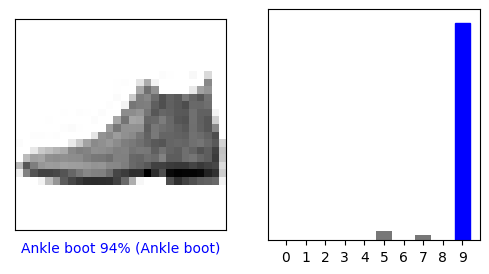

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

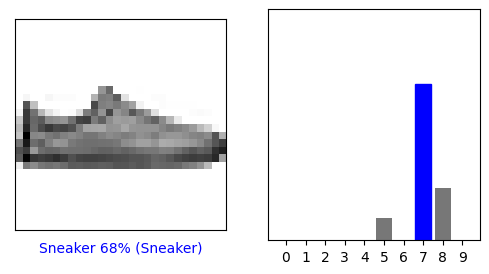

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

让我们用模型的预测绘制几张图像。请注意，即使置信度很高，模型也可能出错。

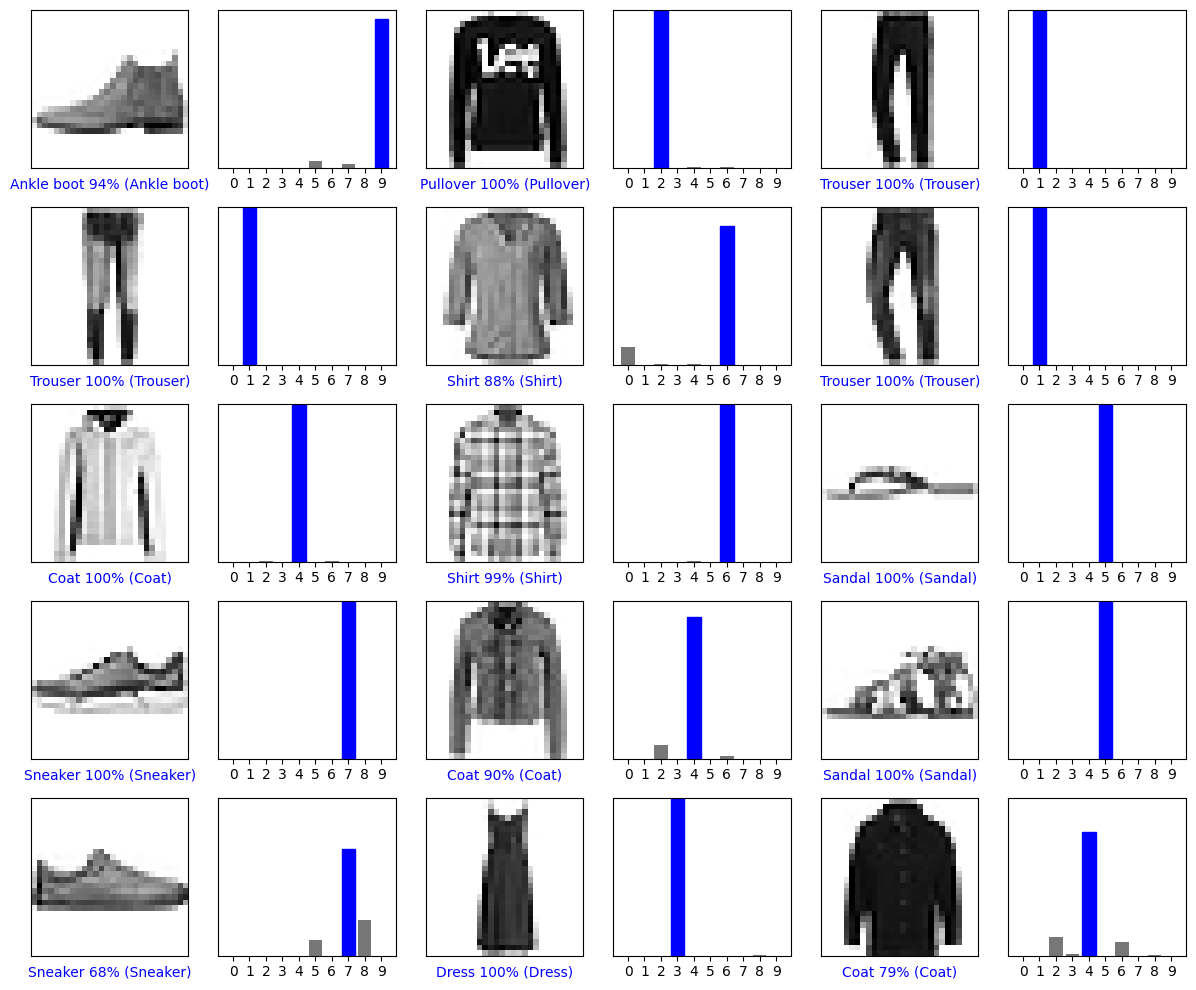

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## 使用训练好的模型

最后，使用训练好的模型对单个图像进行预测。

In [27]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` 模型经过了优化，可同时对一个*批*或一组样本进行预测。因此，即便您只使用一个图像，您也需要将其添加到列表中：

In [28]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


现在预测这个图像的正确标签：

In [29]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


[[5.2377120e-05 3.1492354e-12 9.9818450e-01 6.7298994e-10 8.3265459e-04
  6.6809568e-13 9.3045016e-04 2.3704929e-13 4.5789728e-09 1.9284208e-10]]


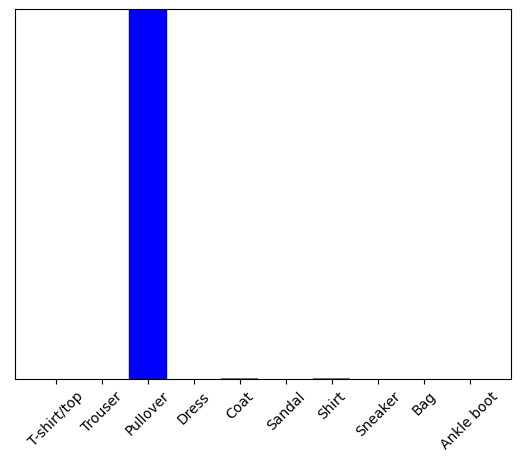

In [30]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

`keras.Model.predict` 会返回一组列表，每个列表对应一批数据中的每个图像。在批次中获取对我们（唯一）图像的预测：

In [31]:
np.argmax(predictions_single[0])

2

该模型会按照预期预测标签。